<a href="https://colab.research.google.com/github/29121999/Assign1/blob/main/Assignment2_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# Install Optuna
!pip install optuna

In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import drive
from google.colab import files
import numpy as np
import pandas as pd
import optuna
from optuna.samplers import TPESampler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from hyperopt.pyll.base import scope


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  

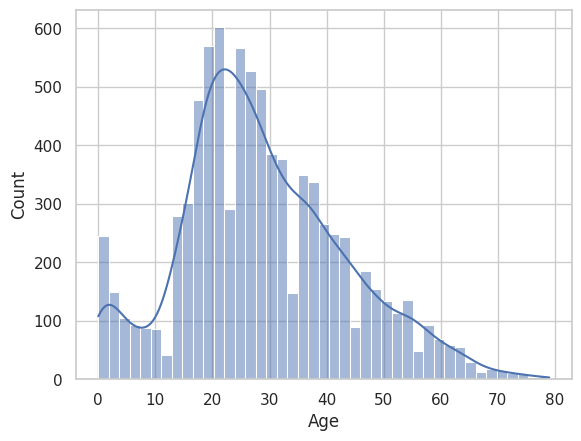

In [26]:
# Load data
train_df = pd.read_csv('https://raw.githubusercontent.com/7PAM2015-0509-2023-Group6/Kaggle-Challenge-Spaceship-Titanic-/main/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/7PAM2015-0509-2023-Group6/Kaggle-Challenge-Spaceship-Titanic-/main/test.csv')

# Check column names
print(train_df.columns)
print(test_df.columns)

# Exploratory Data Analysis (EDA)
train_df.info()
train_df.describe()

# Visualize distributions
sns.histplot(train_df['Age'], kde=True)
plt.show()

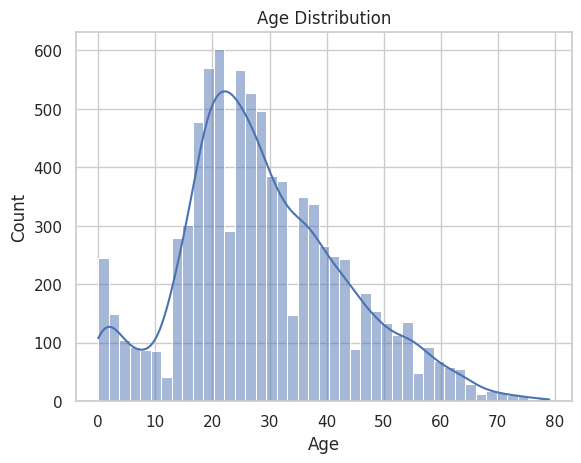

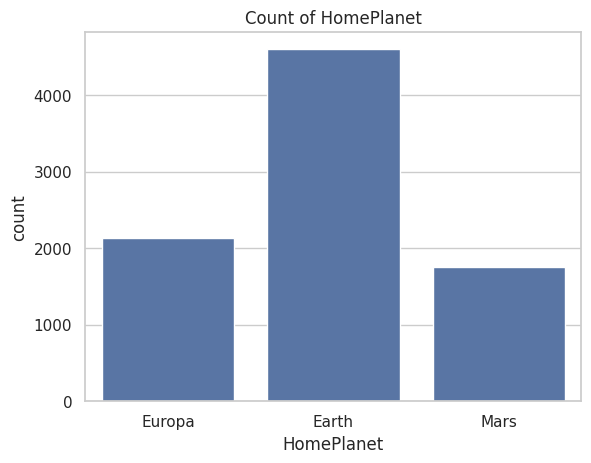

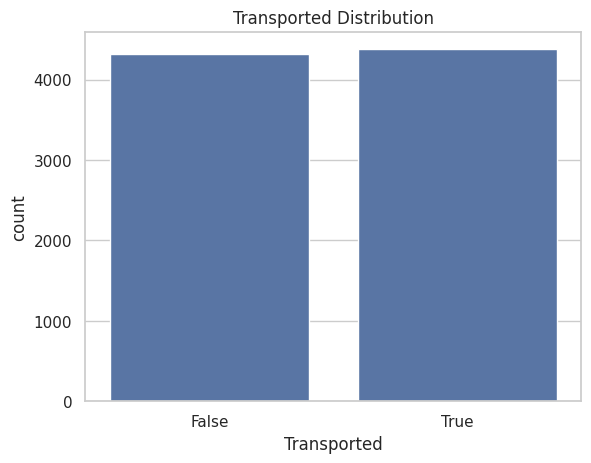

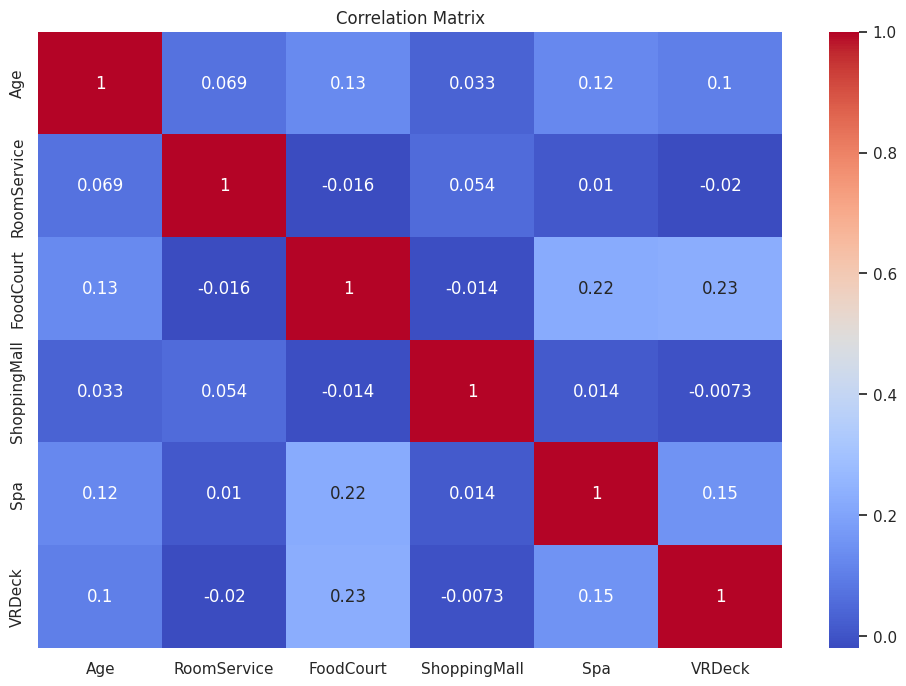

In [27]:
# Example visualizations
sns.histplot(train_df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

sns.countplot(x='HomePlanet', data=train_df)
plt.title('Count of HomePlanet')
plt.show()

sns.countplot(x='Transported', data=train_df)
plt.title('Transported Distribution')
plt.show()

# Only include numeric columns for correlation matrix
numeric_df = train_df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

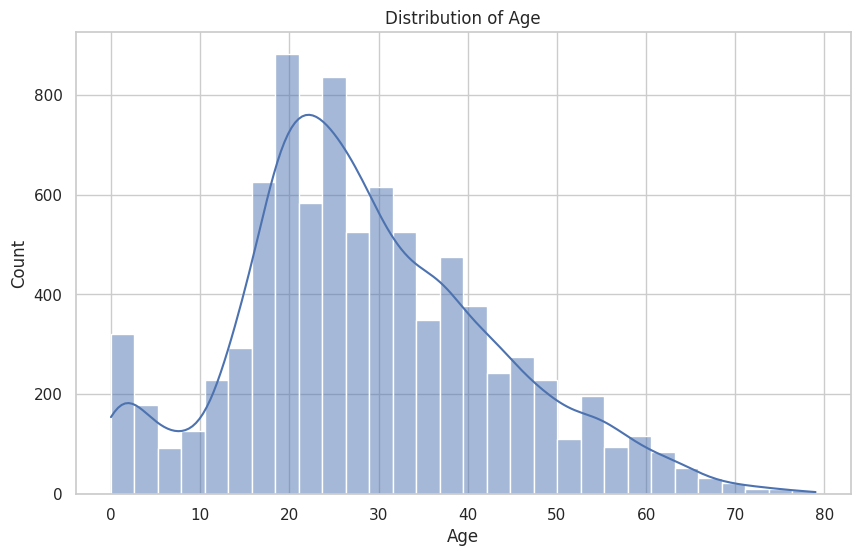

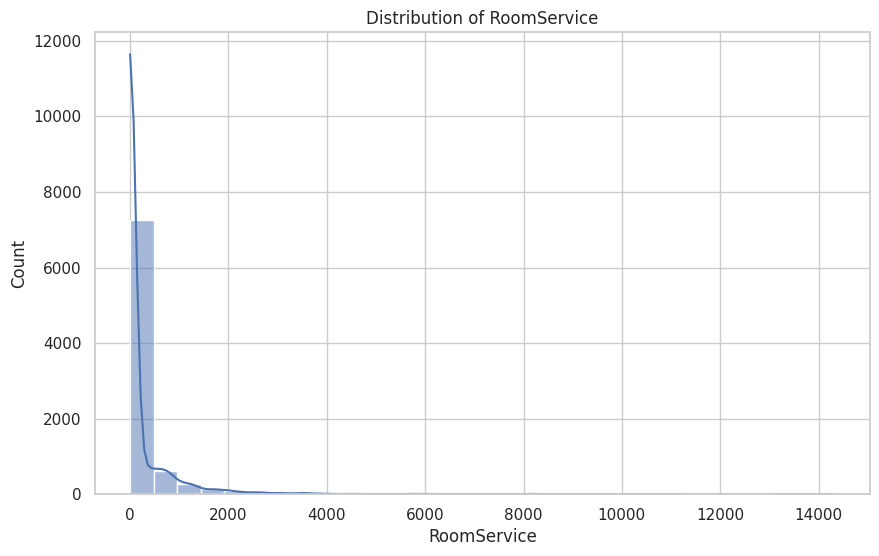

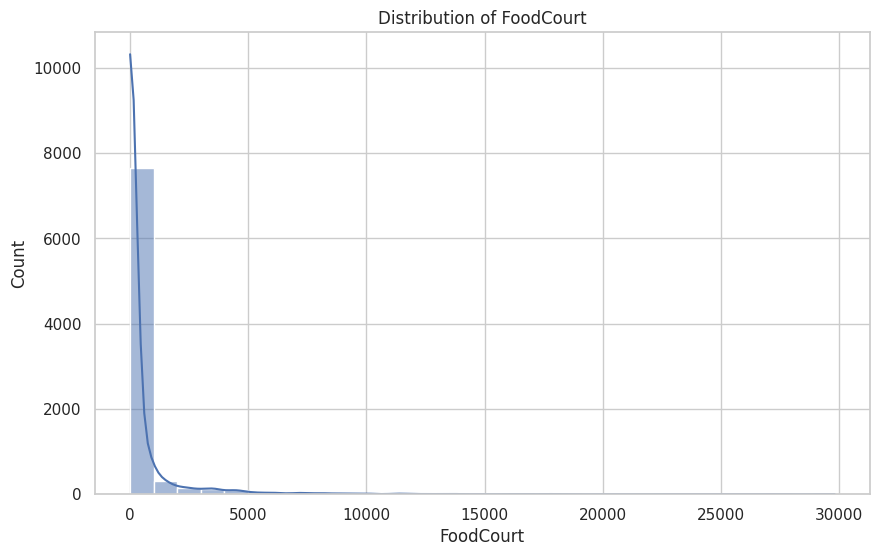

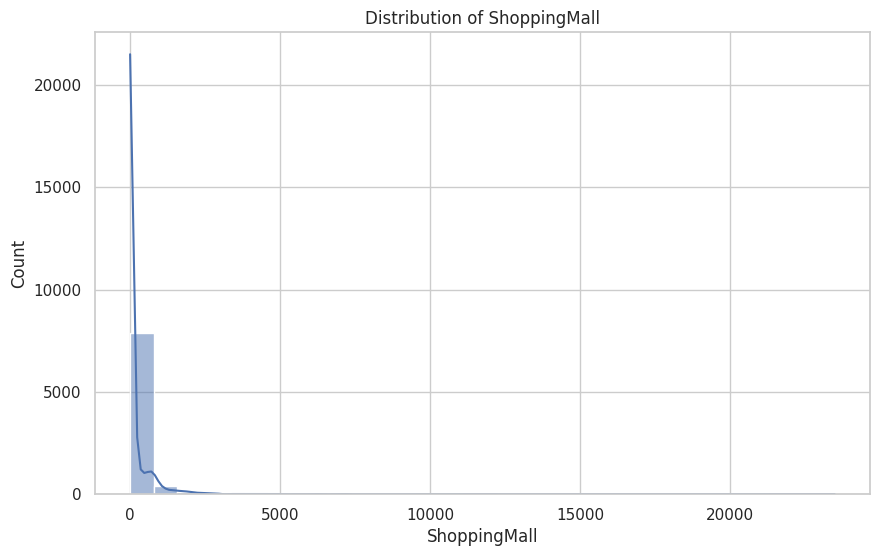

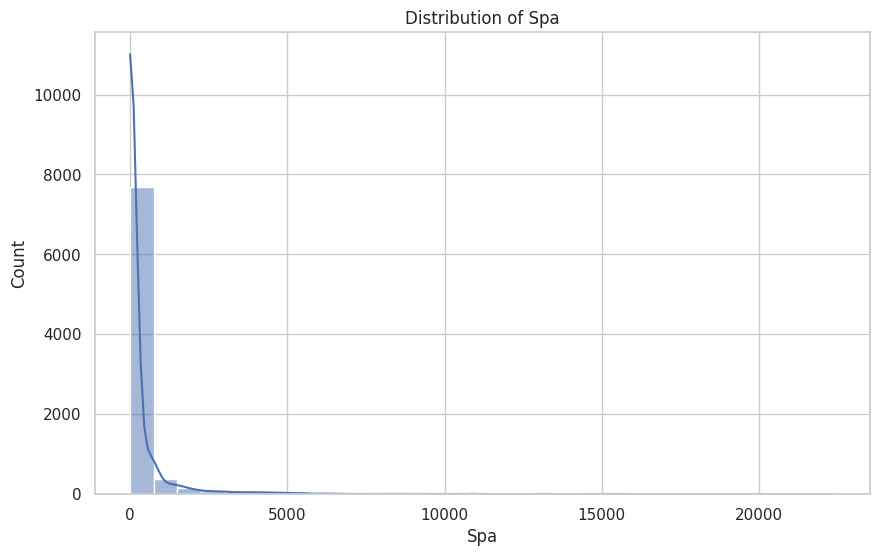

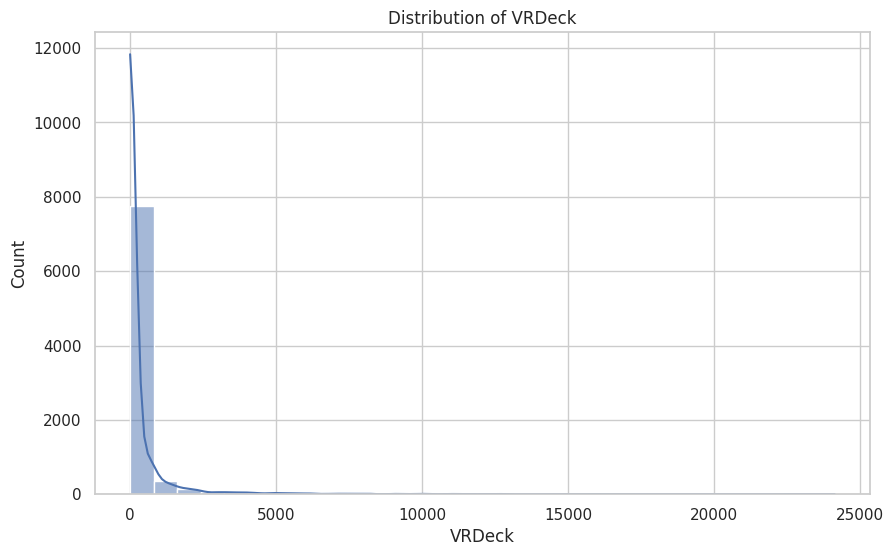

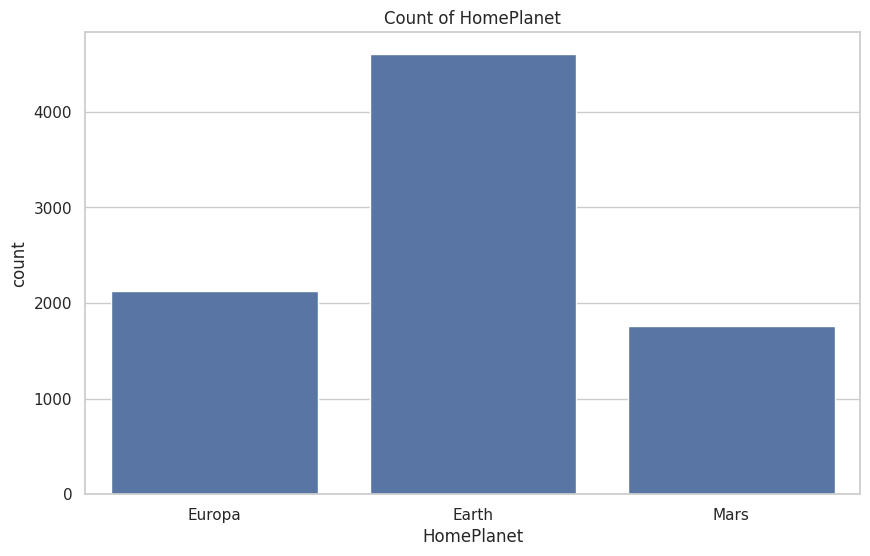

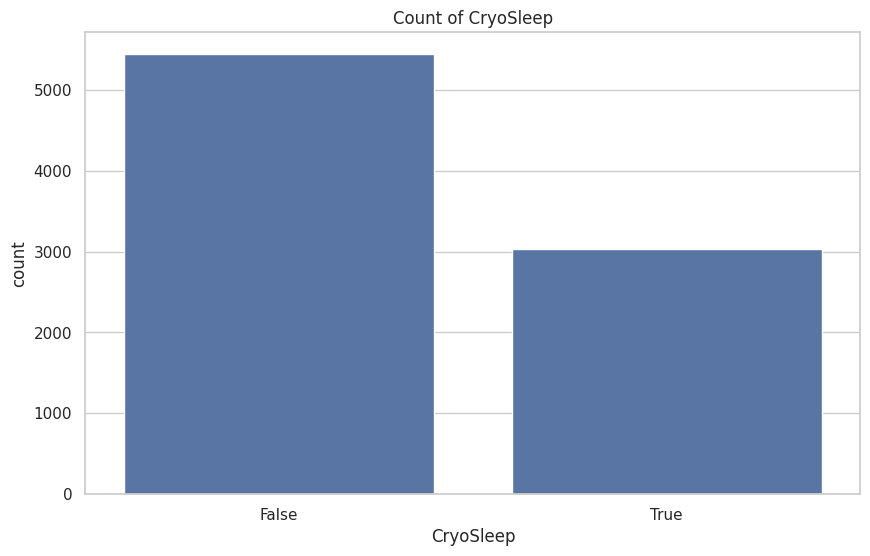

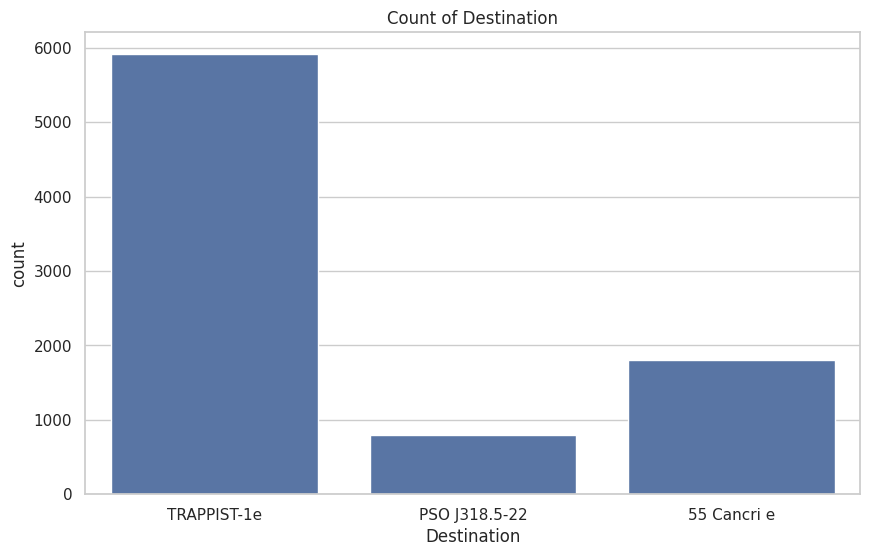

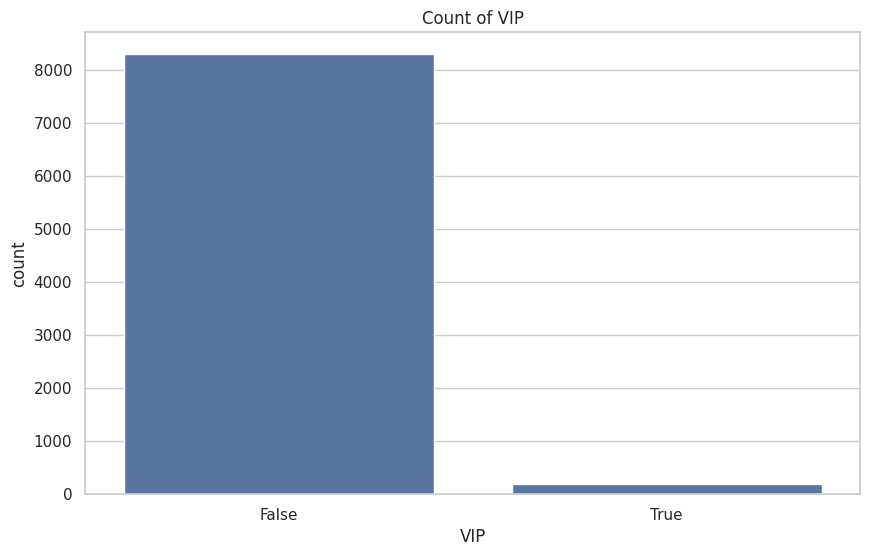

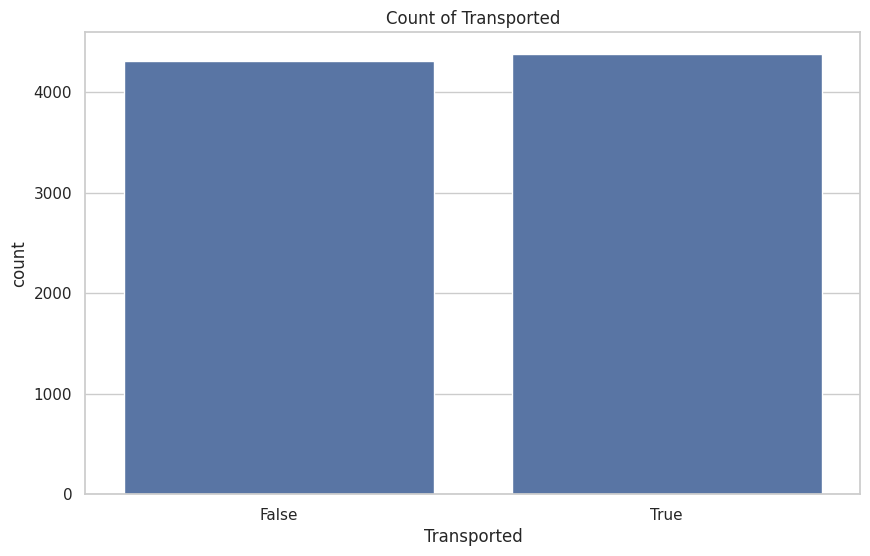

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of numerical features
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Plot distribution of categorical features
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_df, x=feature)
    plt.title(f'Count of {feature}')
    plt.show()


In [29]:
zero_mask_age = train_df['Age'] == 0

# Count the number of zeros in the 'Age' column
numb_zeros_age = zero_mask_age.sum()
print(f"Number of zeros in 'Age' column: {numb_zeros_age}")

Number of zeros in 'Age' column: 178


In [30]:
numeric_features_space_tit = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
imputer = SimpleImputer(strategy='mean')

Does the Age column have any 0 values? True


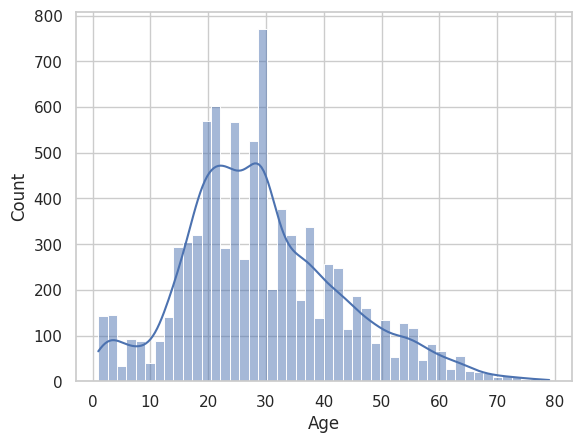

In [31]:
has_zero_age = (train_df['Age'] == 0).any()
print(f"Does the Age column have any 0 values? {has_zero_age}")
train_df['Age'] = train_df['Age'].replace(0, np.nan)
train_df['Age'] = imputer.fit_transform(train_df[['Age']]).ravel()

# Visualize distributions
sns.histplot(train_df['Age'], kde=True)
plt.show()

In [32]:
for feature in numeric_features_space_tit:
    has_nan_val = train_df[feature].isna().any()
    print(f"Does the '{feature}' column before imputer have any NaN values? {has_nan_val}")
print("\n\n\n")
train_df[numeric_features_space_tit] = imputer.fit_transform(train_df[numeric_features_space_tit])


for feature in numeric_features_space_tit:
    has_nan_val = train_df[feature].isna().any()
    print(f"Does the '{feature}' column have after imputer any NaN values? {has_nan_val}")


print(train_df[numeric_features_space_tit])




Does the 'Age' column before imputer have any NaN values? False
Does the 'RoomService' column before imputer have any NaN values? True
Does the 'FoodCourt' column before imputer have any NaN values? True
Does the 'ShoppingMall' column before imputer have any NaN values? True
Does the 'Spa' column before imputer have any NaN values? True
Does the 'VRDeck' column before imputer have any NaN values? True




Does the 'Age' column have after imputer any NaN values? False
Does the 'RoomService' column have after imputer any NaN values? False
Does the 'FoodCourt' column have after imputer any NaN values? False
Does the 'ShoppingMall' column have after imputer any NaN values? False
Does the 'Spa' column have after imputer any NaN values? False
Does the 'VRDeck' column have after imputer any NaN values? False
       Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
0     39.0          0.0        0.0           0.0     0.0     0.0
1     24.0        109.0        9.0          25.0   549.0 

In [33]:
test_df
has_zero1_test = (test_df['Age'] == 0).any()
print(f"Does the Age column have any 0 values? {has_zero1_test}")

Does the Age column have any 0 values? True


In [34]:
zero_mask_test_age = test_df['Age'] == 0

# Count the number of zeros in the 'Age' column
num_zeros_test_age = zero_mask_test_age.sum()
print(f"Number of zeros in 'Age' column: {num_zeros_test_age}")

Number of zeros in 'Age' column: 82


In [35]:
test_df['Age'] = test_df['Age'].replace(0, np.nan)
test_df['Age'] = imputer.fit_transform(test_df[['Age']]).ravel()

In [36]:
for feature1 in numeric_features_space_tit:
    has_nan_test = test_df[feature1].isna().any()
    print(f"Does the '{feature1}' column before imputer have any NaN values? {has_nan_test}")
print("\n\n\n")
test_df[numeric_features_space_tit] = imputer.fit_transform(test_df[numeric_features_space_tit])


for feature1 in numeric_features_space_tit:
    has_nan_test = test_df[feature1].isna().any()
    print(f"Does the '{feature1}' column have after imputer any NaN values? {has_nan_test}")

Does the 'Age' column before imputer have any NaN values? False
Does the 'RoomService' column before imputer have any NaN values? True
Does the 'FoodCourt' column before imputer have any NaN values? True
Does the 'ShoppingMall' column before imputer have any NaN values? True
Does the 'Spa' column before imputer have any NaN values? True
Does the 'VRDeck' column before imputer have any NaN values? True




Does the 'Age' column have after imputer any NaN values? False
Does the 'RoomService' column have after imputer any NaN values? False
Does the 'FoodCourt' column have after imputer any NaN values? False
Does the 'ShoppingMall' column have after imputer any NaN values? False
Does the 'Spa' column have after imputer any NaN values? False
Does the 'VRDeck' column have after imputer any NaN values? False


In [37]:
has_nan_train_HomePlanet = train_df['HomePlanet'].isna().any()
print(f"Does the HomePlanet column before imputer have any NaN values? {has_nan_train_HomePlanet}")

Does the HomePlanet column before imputer have any NaN values? True


In [38]:
categorical_features_space_tit = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
# Initialize the SimpleImputer for the categorical features
categorical_imputer = SimpleImputer(strategy='most_frequent')


In [39]:
# Impute missing values for categorical features in both training and test sets
for feature_cat in categorical_features_space_tit:
    has_nan_train_cat = train_df[feature_cat].isna().any()
    print(f"Does the '{feature_cat}' column Train before imputer have any NaN values? {has_nan_train_cat}")
    has_nan_test_cat = test_df[feature_cat].isna().any()
    print(f"Does the '{feature_cat}' column Test before imputer have any NaN values? {has_nan_test_cat}")


print("\n\n\n")
train_df[categorical_features_space_tit] = categorical_imputer.fit_transform(train_df[categorical_features_space_tit])
test_df[categorical_features_space_tit] = categorical_imputer.transform(test_df[categorical_features_space_tit])

# Impute missing values for categorical features in both training and test sets
for feature_cat in categorical_features_space_tit:
    has_nan_train_cat = train_df[feature_cat].isna().any()
    print(f"Does the '{feature_cat}' column Train before imputer have any NaN values? {has_nan_train_cat}")
    has_nan_test_cat = test_df[feature_cat].isna().any()
    print(f"Does the '{feature_cat}' column Test before imputer have any NaN values? {has_nan_test_cat}")

Does the 'HomePlanet' column Train before imputer have any NaN values? True
Does the 'HomePlanet' column Test before imputer have any NaN values? True
Does the 'CryoSleep' column Train before imputer have any NaN values? True
Does the 'CryoSleep' column Test before imputer have any NaN values? True
Does the 'Cabin' column Train before imputer have any NaN values? True
Does the 'Cabin' column Test before imputer have any NaN values? True
Does the 'Destination' column Train before imputer have any NaN values? True
Does the 'Destination' column Test before imputer have any NaN values? True
Does the 'VIP' column Train before imputer have any NaN values? True
Does the 'VIP' column Test before imputer have any NaN values? True




Does the 'HomePlanet' column Train before imputer have any NaN values? False
Does the 'HomePlanet' column Test before imputer have any NaN values? False
Does the 'CryoSleep' column Train before imputer have any NaN values? False
Does the 'CryoSleep' column Test bef

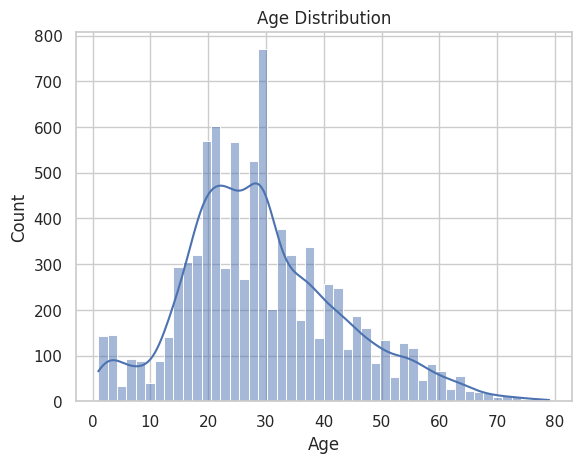

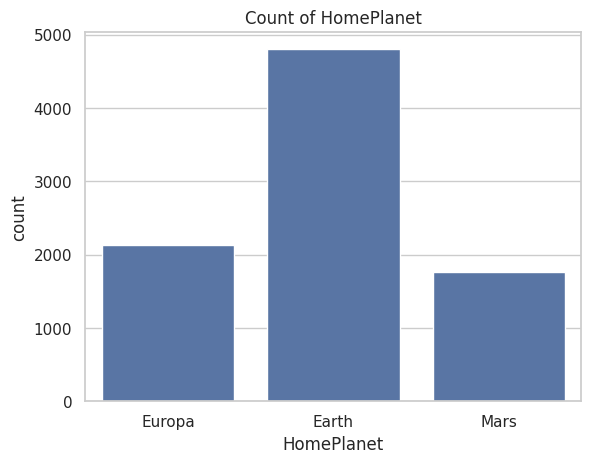

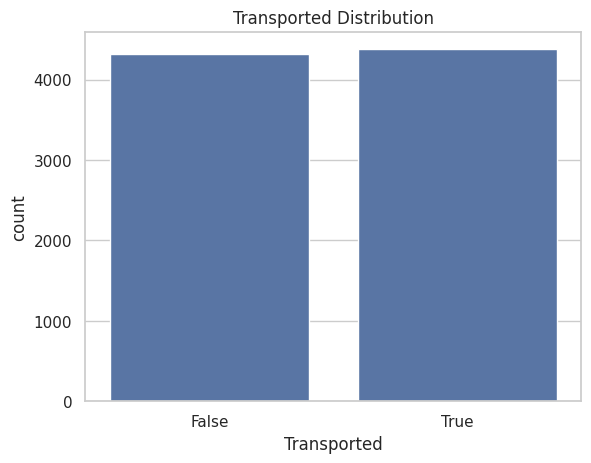

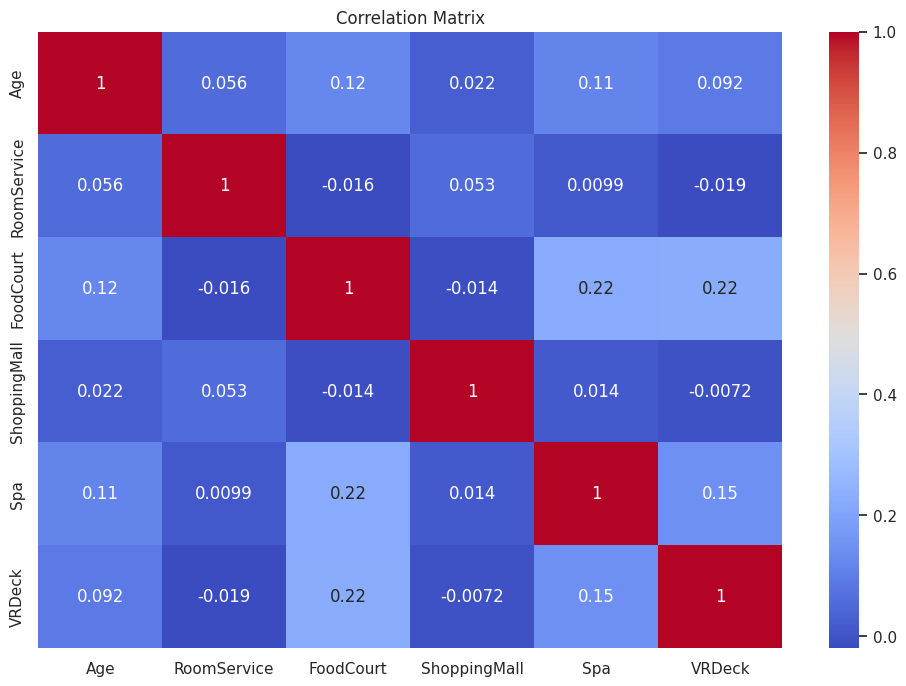

In [40]:
# Example visualizations
sns.histplot(train_df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

sns.countplot(x='HomePlanet', data=train_df)
plt.title('Count of HomePlanet')
plt.show()

sns.countplot(x='Transported', data=train_df)
plt.title('Transported Distribution')
plt.show()

# Only include numeric columns for correlation matrix
numeric_df = train_df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

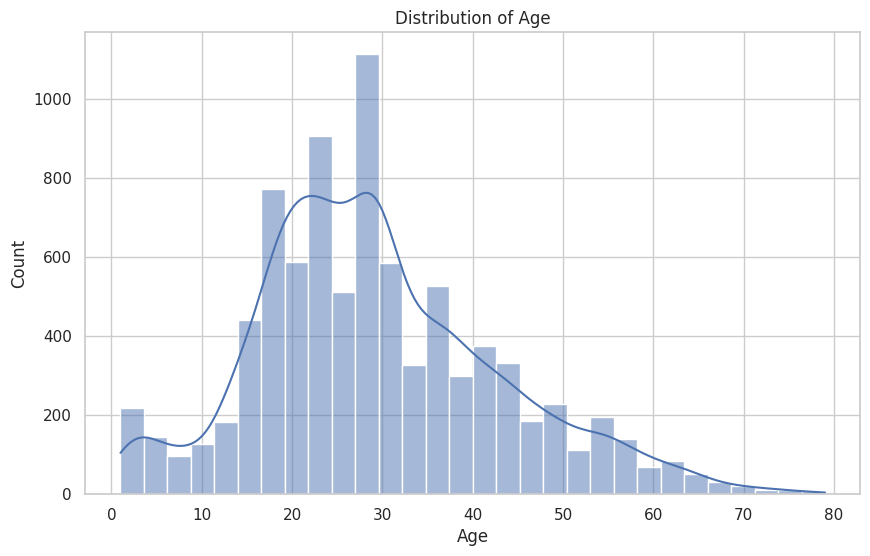

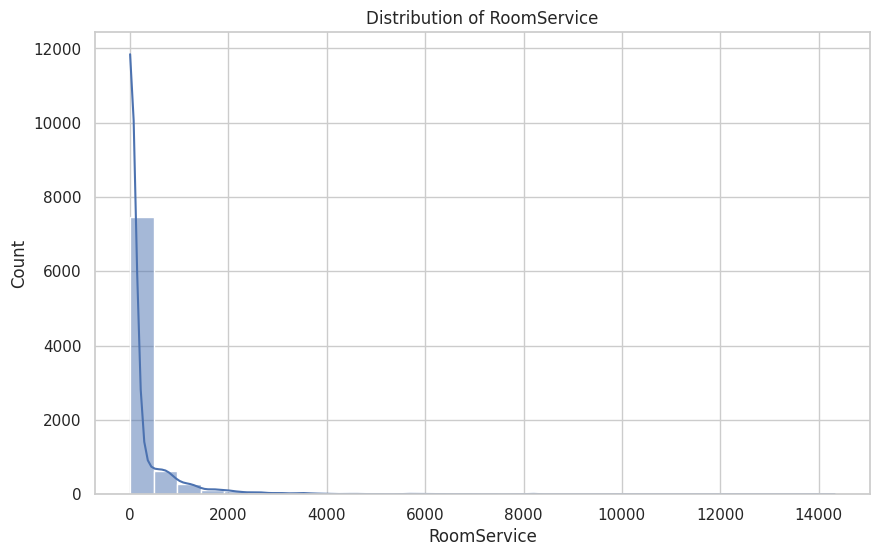

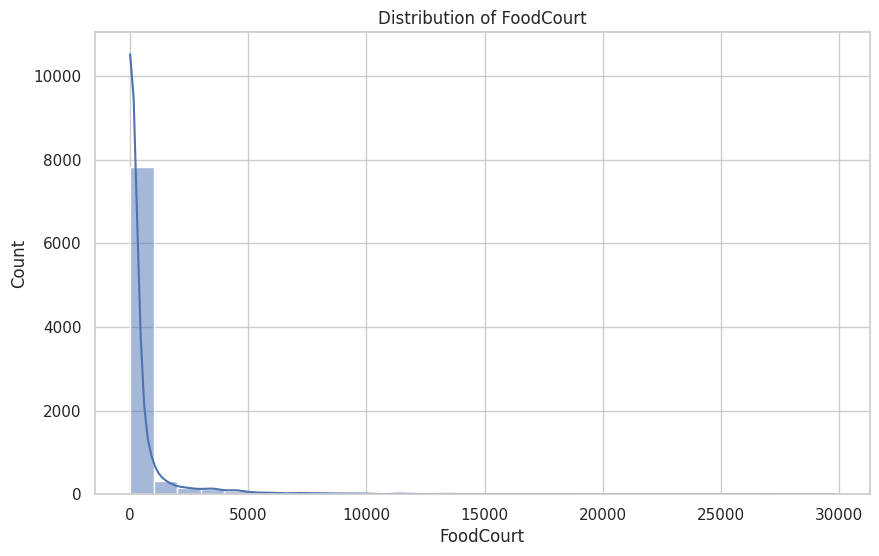

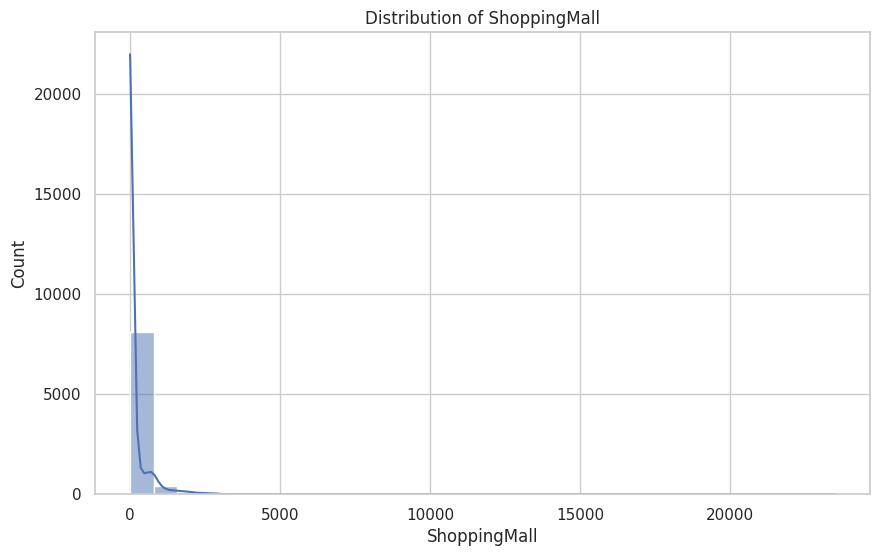

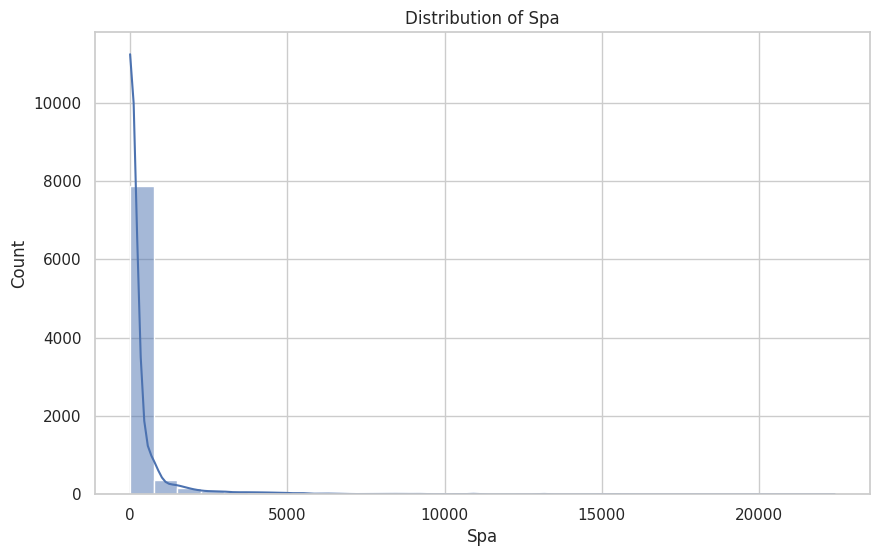

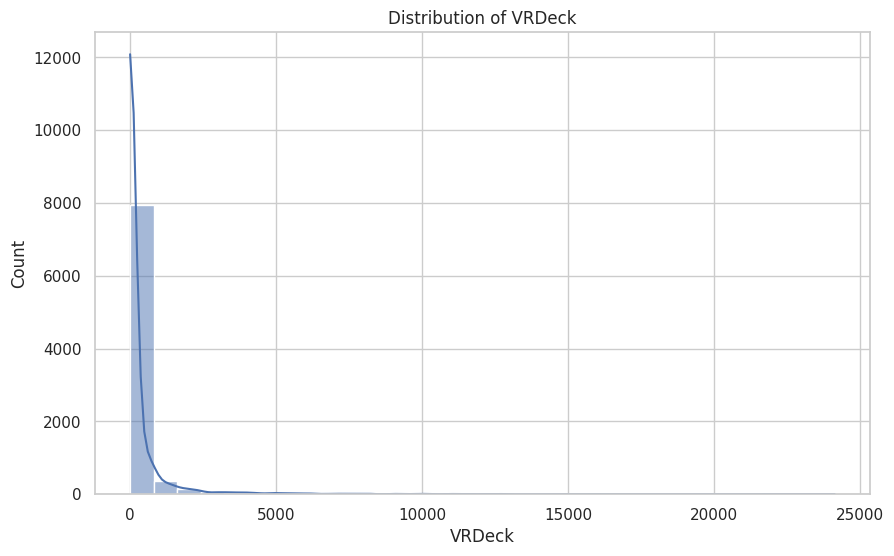

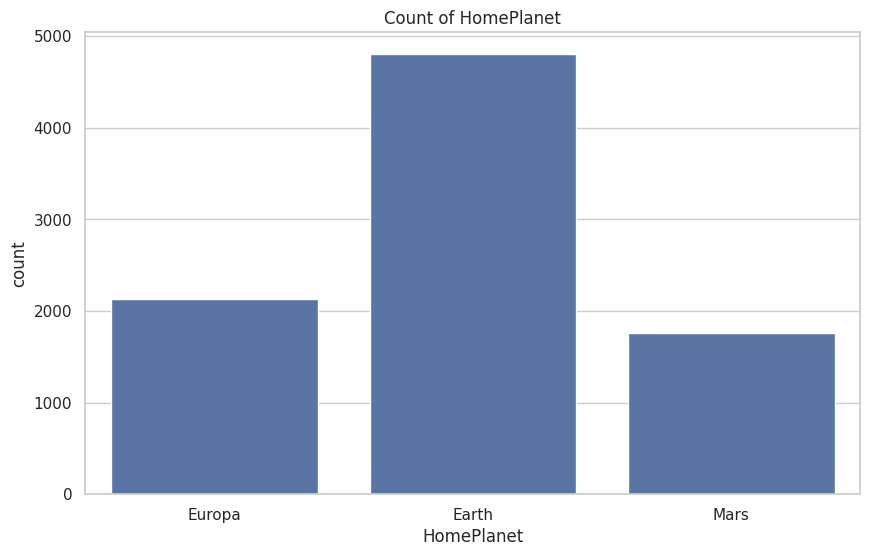

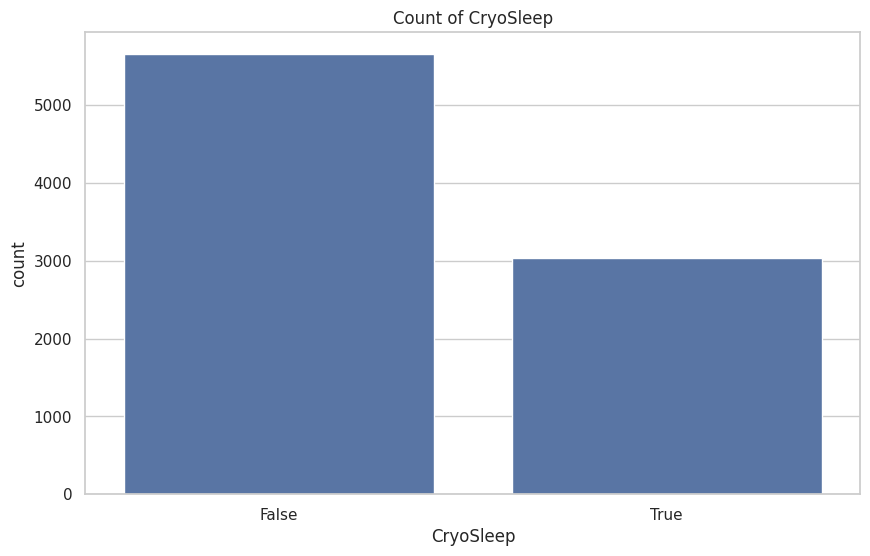

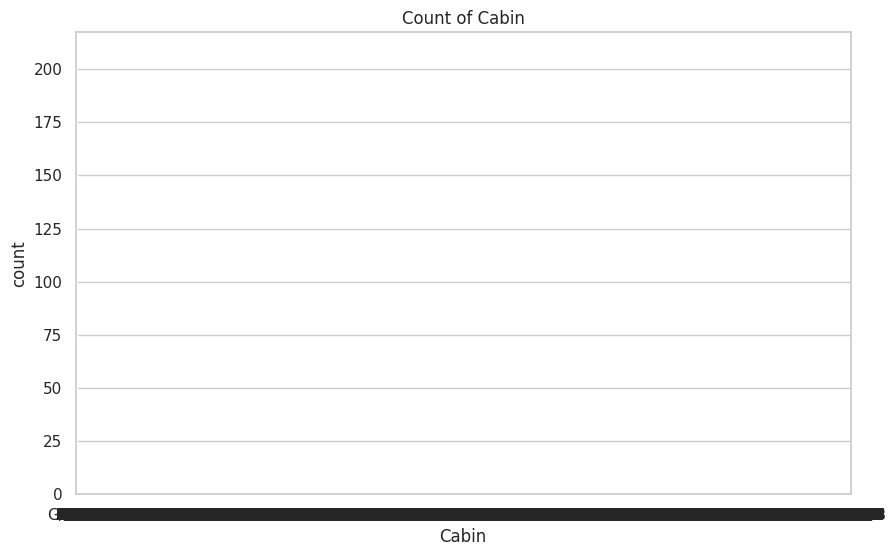

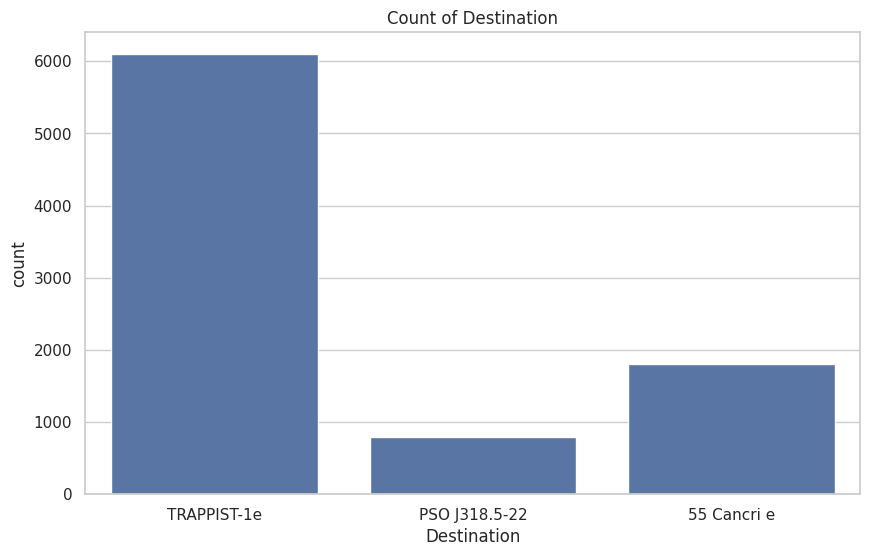

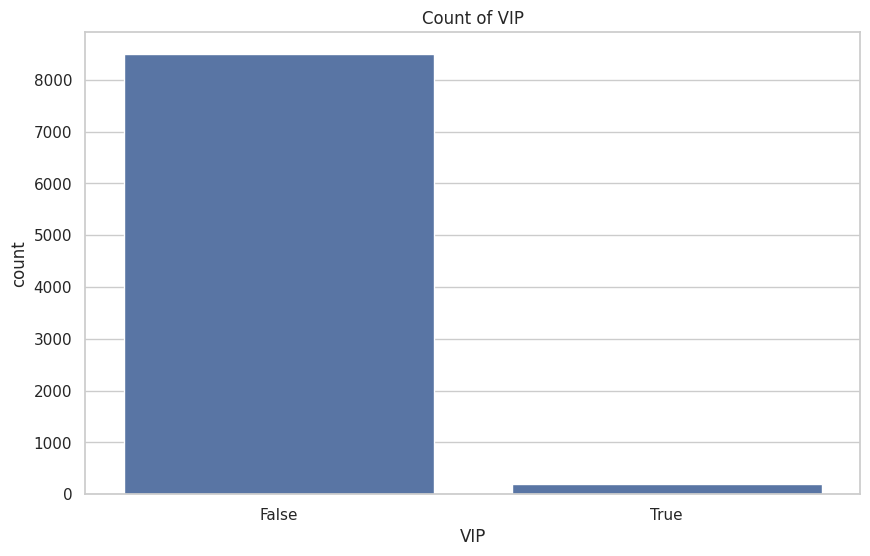

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of numerical features
for feature in numeric_features_space_tit:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Plot distribution of categorical features
for feature in categorical_features_space_tit:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_df, x=feature)
    plt.title(f'Count of {feature}')
    plt.show()


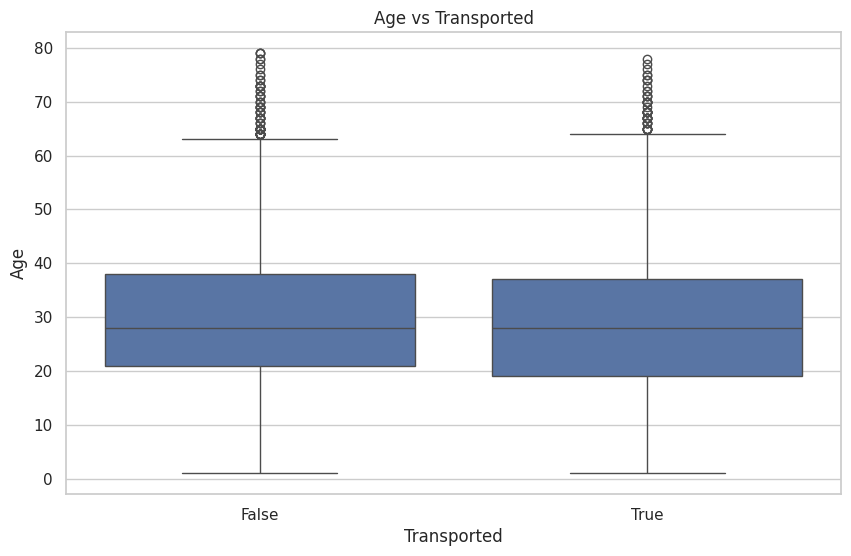

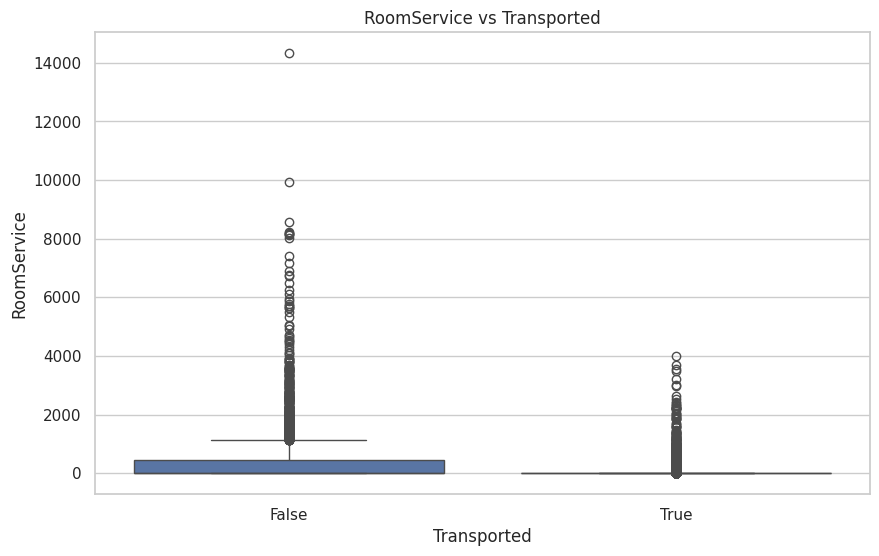

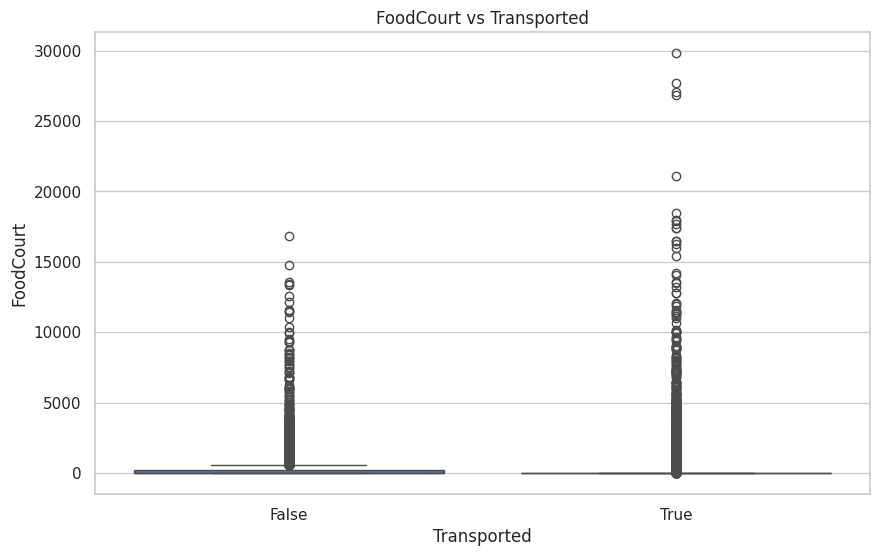

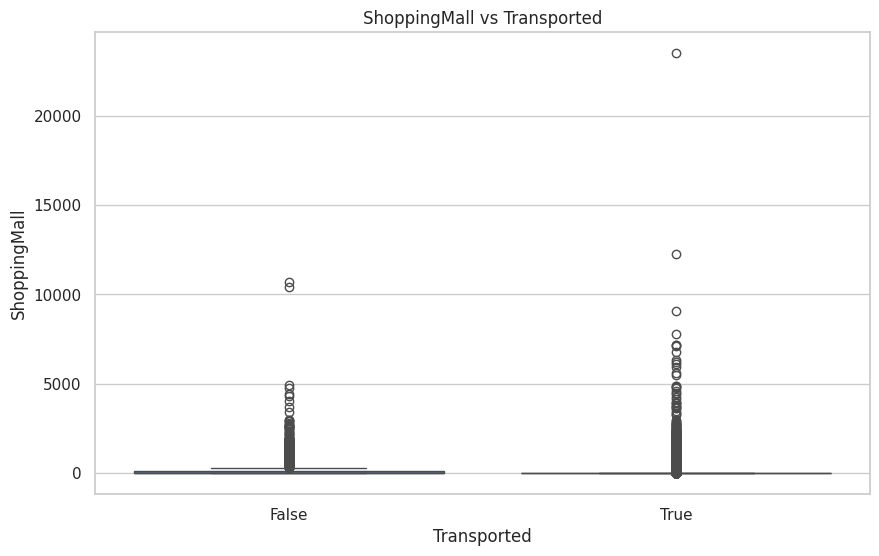

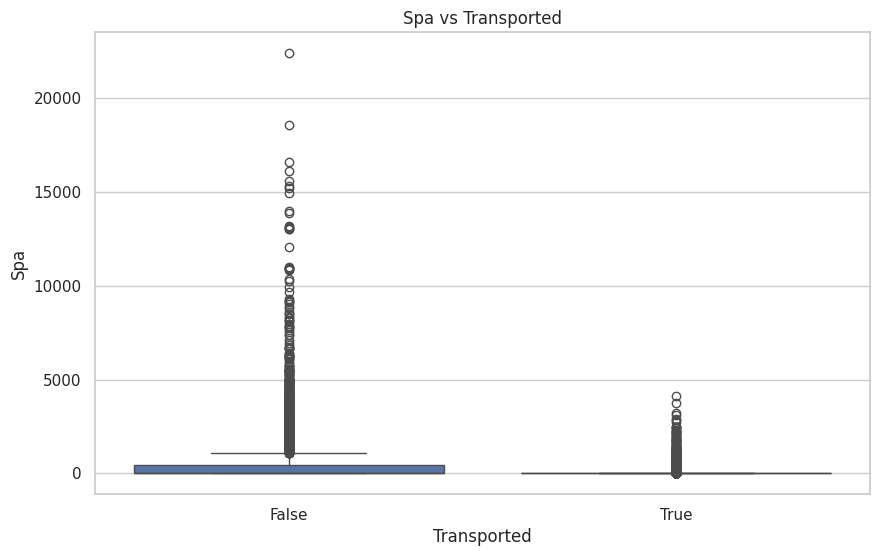

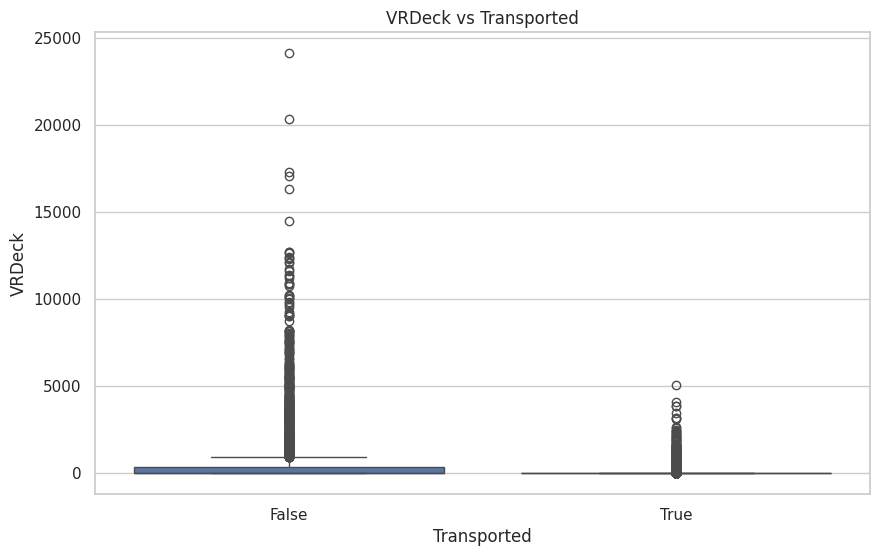

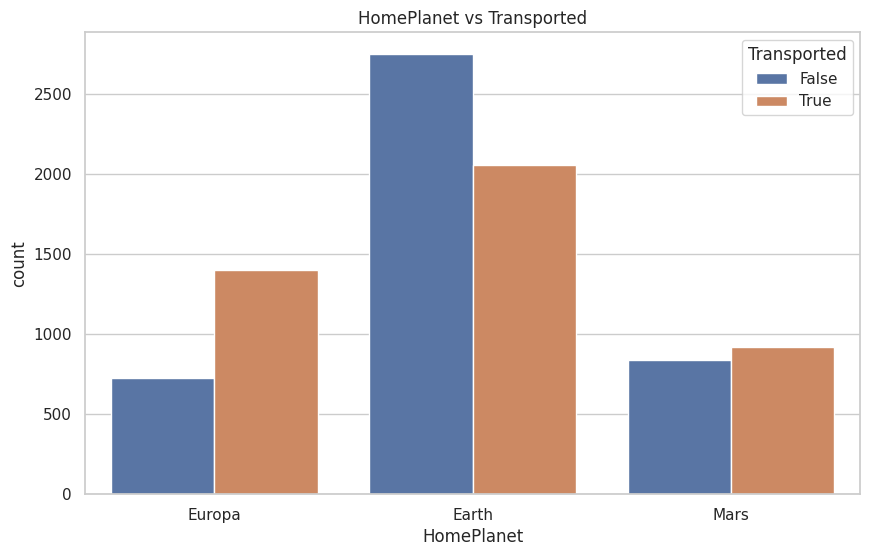

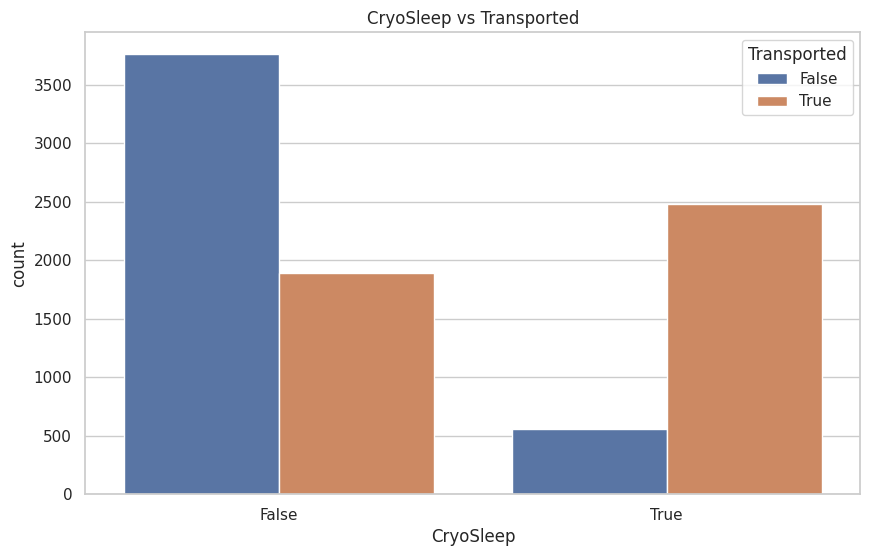

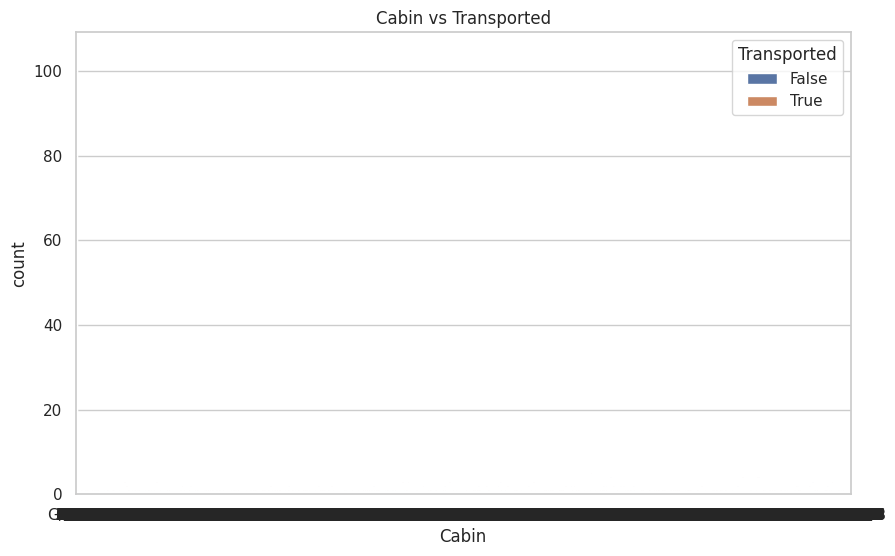

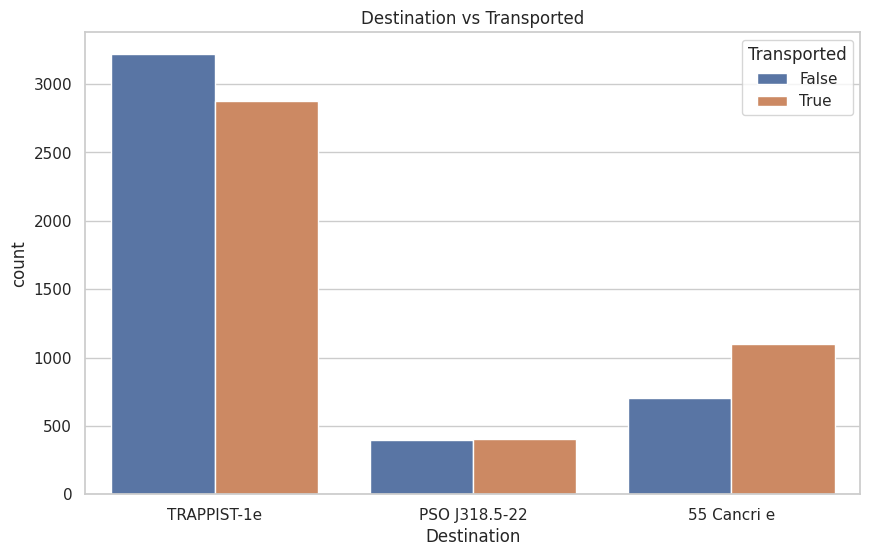

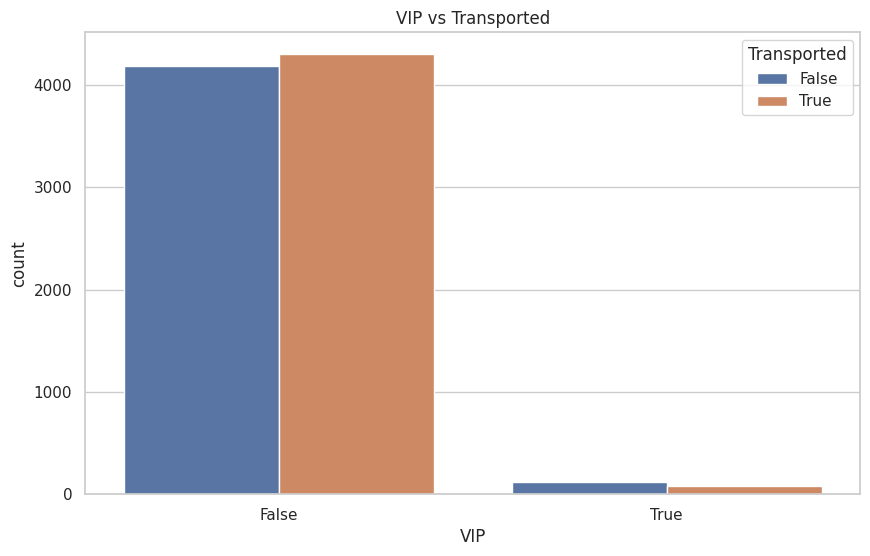

In [42]:
# Plot relationship between numerical features and target variable 'Transported'
for feature in numeric_features_space_tit:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train_df, x='Transported', y=feature)
    plt.title(f'{feature} vs Transported')
    plt.show()

# Plot relationship between categorical features and target variable 'Transported'
for feature in categorical_features_space_tit:
    if feature != 'Transported':
        plt.figure(figsize=(10, 6))
        sns.countplot(data=train_df, x=feature, hue='Transported')
        plt.title(f'{feature} vs Transported')
        plt.show()


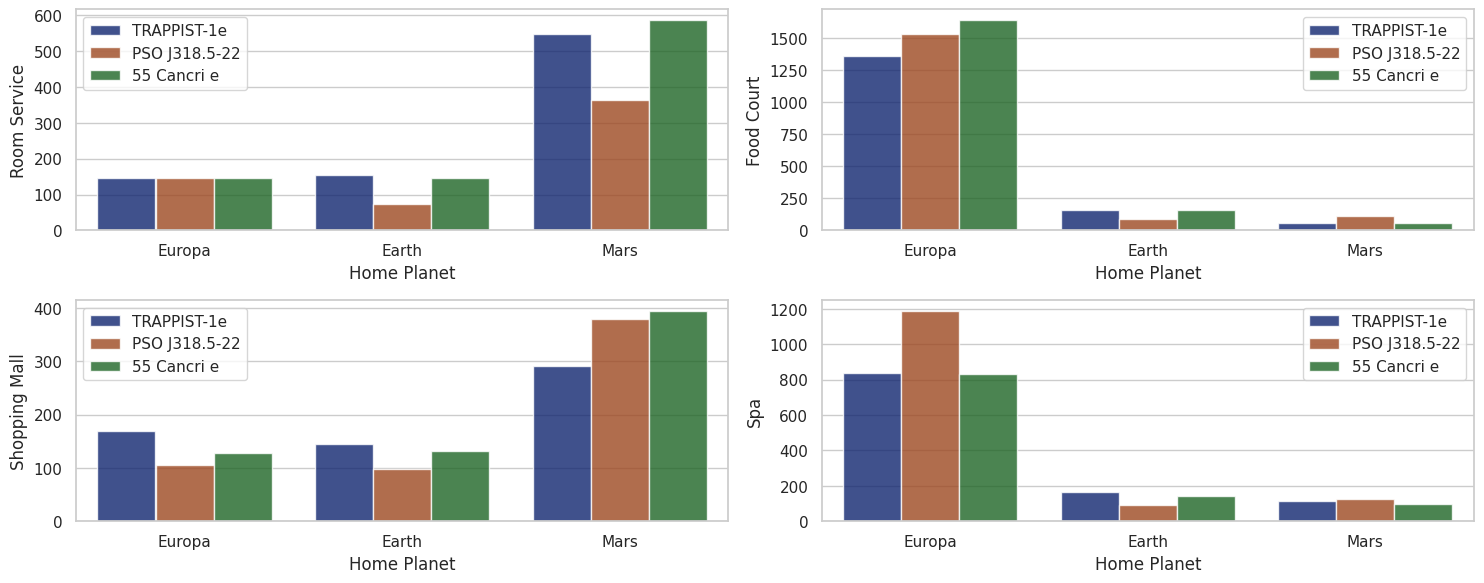

In [43]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 6))

sns.barplot(
    data=train_df, x="HomePlanet", y="FoodCourt", hue="Destination",
    errorbar=None, palette='dark', alpha=0.8, ax=axes[0,1],
    )
sns.barplot(
    data=train_df, x="HomePlanet", y="RoomService", hue="Destination",
    errorbar=None, palette='dark', alpha=0.8, ax=axes[0, 0]
    )
sns.barplot(
    data=train_df,x="HomePlanet", y="ShoppingMall", hue="Destination",
    errorbar=None, palette='dark', alpha=0.8, ax=axes[1, 0]
    )
sns.barplot(
    data=train_df, x="HomePlanet", y="Spa", hue="Destination",
    errorbar=None, palette='dark', alpha=0.8, ax = axes[1,1]
    )
axes[0,0].legend(title="")
axes[0,1].legend(title="")
axes[1,0].legend(title="")
axes[1,1].legend(title="")
axes[0,0].set_xlabel("Home Planet")
axes[0,0].set_ylabel("Room Service")
axes[0,1].set_xlabel("Home Planet")
axes[0,1].set_ylabel("Food Court")
axes[1,0].set_xlabel("Home Planet")
axes[1,0].set_ylabel("Shopping Mall")
axes[1,1].set_xlabel("Home Planet")
plt.tight_layout()
plt.show()

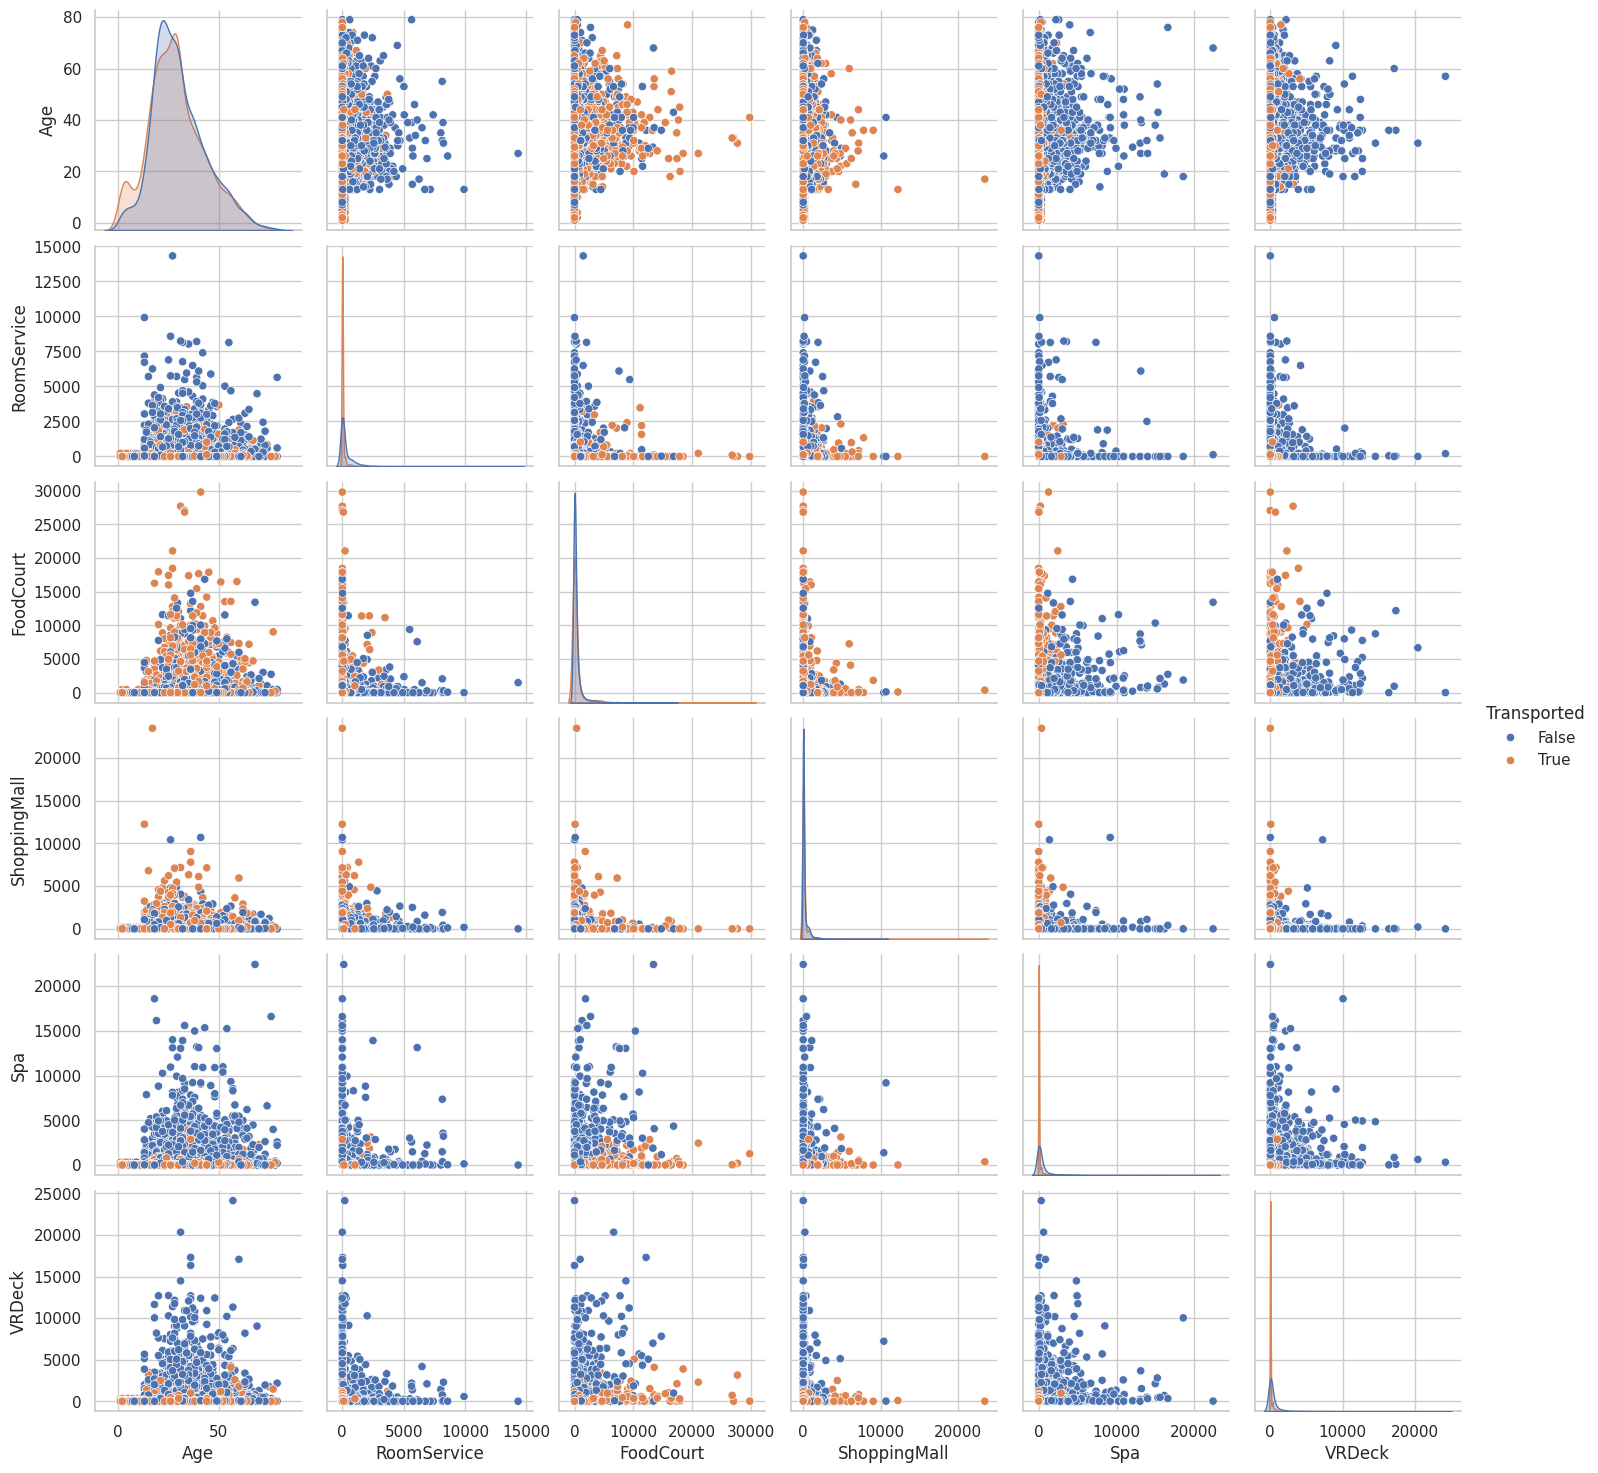

In [44]:
# Pairplot of numerical features colored by 'Transported'
sns.pairplot(train_df, hue='Transported', vars=numeric_features_space_tit)
plt.show()


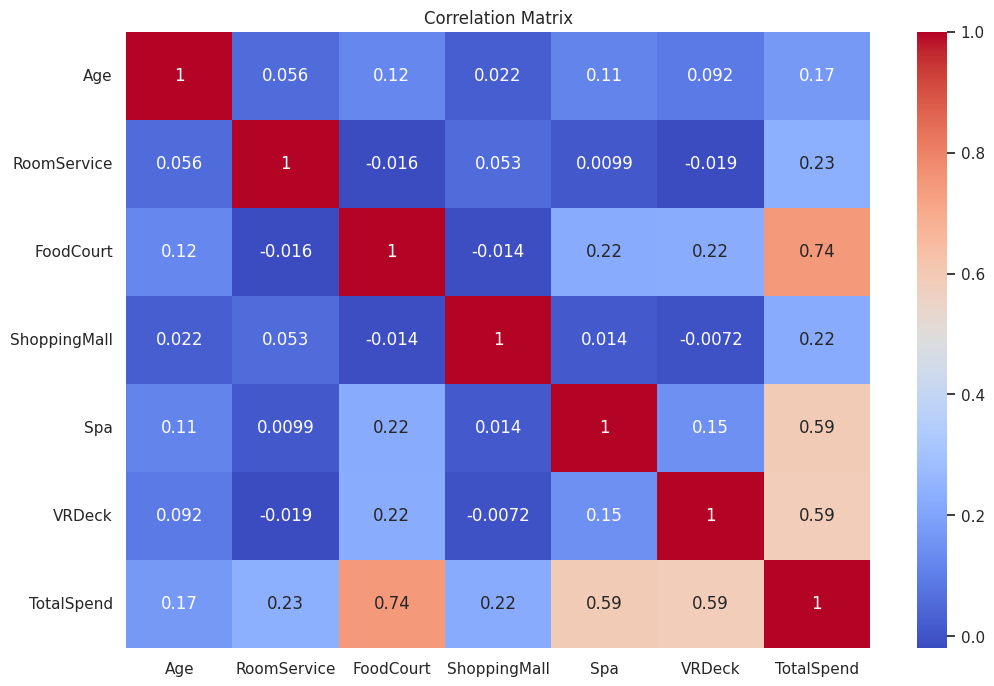

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the new feature 'TotalSpend'
train_df['TotalSpend'] = train_df['RoomService'] + train_df['FoodCourt'] + train_df['ShoppingMall'] + train_df['Spa'] + train_df['VRDeck']

# Select only numeric columns for correlation matrix
numeric_columns = train_df.select_dtypes(include=['number']).columns

# Fill missing values in numeric columns with 0 (or another strategy you prefer)
train_df[numeric_columns] = train_df[numeric_columns].fillna(0)

# Calculate the correlation matrix
correlation_matrix = train_df[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
